## **Name: Vatsal Parikh**

Dataset - [Indian Liver Patient Records](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records/data)

**Dataset Information**

This dataset comprises 416 records of patients with liver conditions and 167 records of individuals without liver ailments. The data was gathered from the North East region of Andhra Pradesh, India. The column labeled "Dataset" serves as the class label, distinguishing between those with liver disease and those without. Among the entries, 441 pertain to male patients, while 142 relate to female patients.

**The data consists of the following attributes:**

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: Field used to split the data into two sets (patient with liver disease, or no disease)

**Task:**

The task is to build a model that uses these patient records to determine which patients have liver disease and which ones do not.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import warnings
# Filter out any warnings
warnings.filterwarnings("ignore")

## **1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [3]:
df = pd.read_csv("indian_liver_patient.csv")
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### **Summary Statistics and Descriptions**

Here for statistical analysis of each attribute, we used ***describe***, which is used to generate summary statistics of a Dataframe. Using this, we can get an initial sense of a data distribution and whether there are any outliers present in the data.

In [4]:
#Describing the statistical values of each features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**Observations made from summary statistics:**

- Gender is the only non-numeric variable in the dataset. All other attributes are expressed in numerical values.
- The age of patients ranges from 4 to 90 years, with a mean age of approximately 44.75 years.
- The dataset consists of ten features and one target variable labeled 'dataset'. A value of 1 signifies the presence of liver disease, while a value of 2 indicates the absence of liver disease.

**Checking any missing values present in the dataset.**

In [6]:
# Checking if any missing values are present
missing_values = df.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


By analysing the missing values, it was found that there were 4 missing values in the Albumin_and_Globulin Ratio and hence they must recieve special treatment.

### **Visualization of each attributes**

Creating ***histograms*** for each numerical feature allows us to visually represent the distribution of data, providing a graphical depiction of the frequency or count of data points within specific value ranges for each attribute.

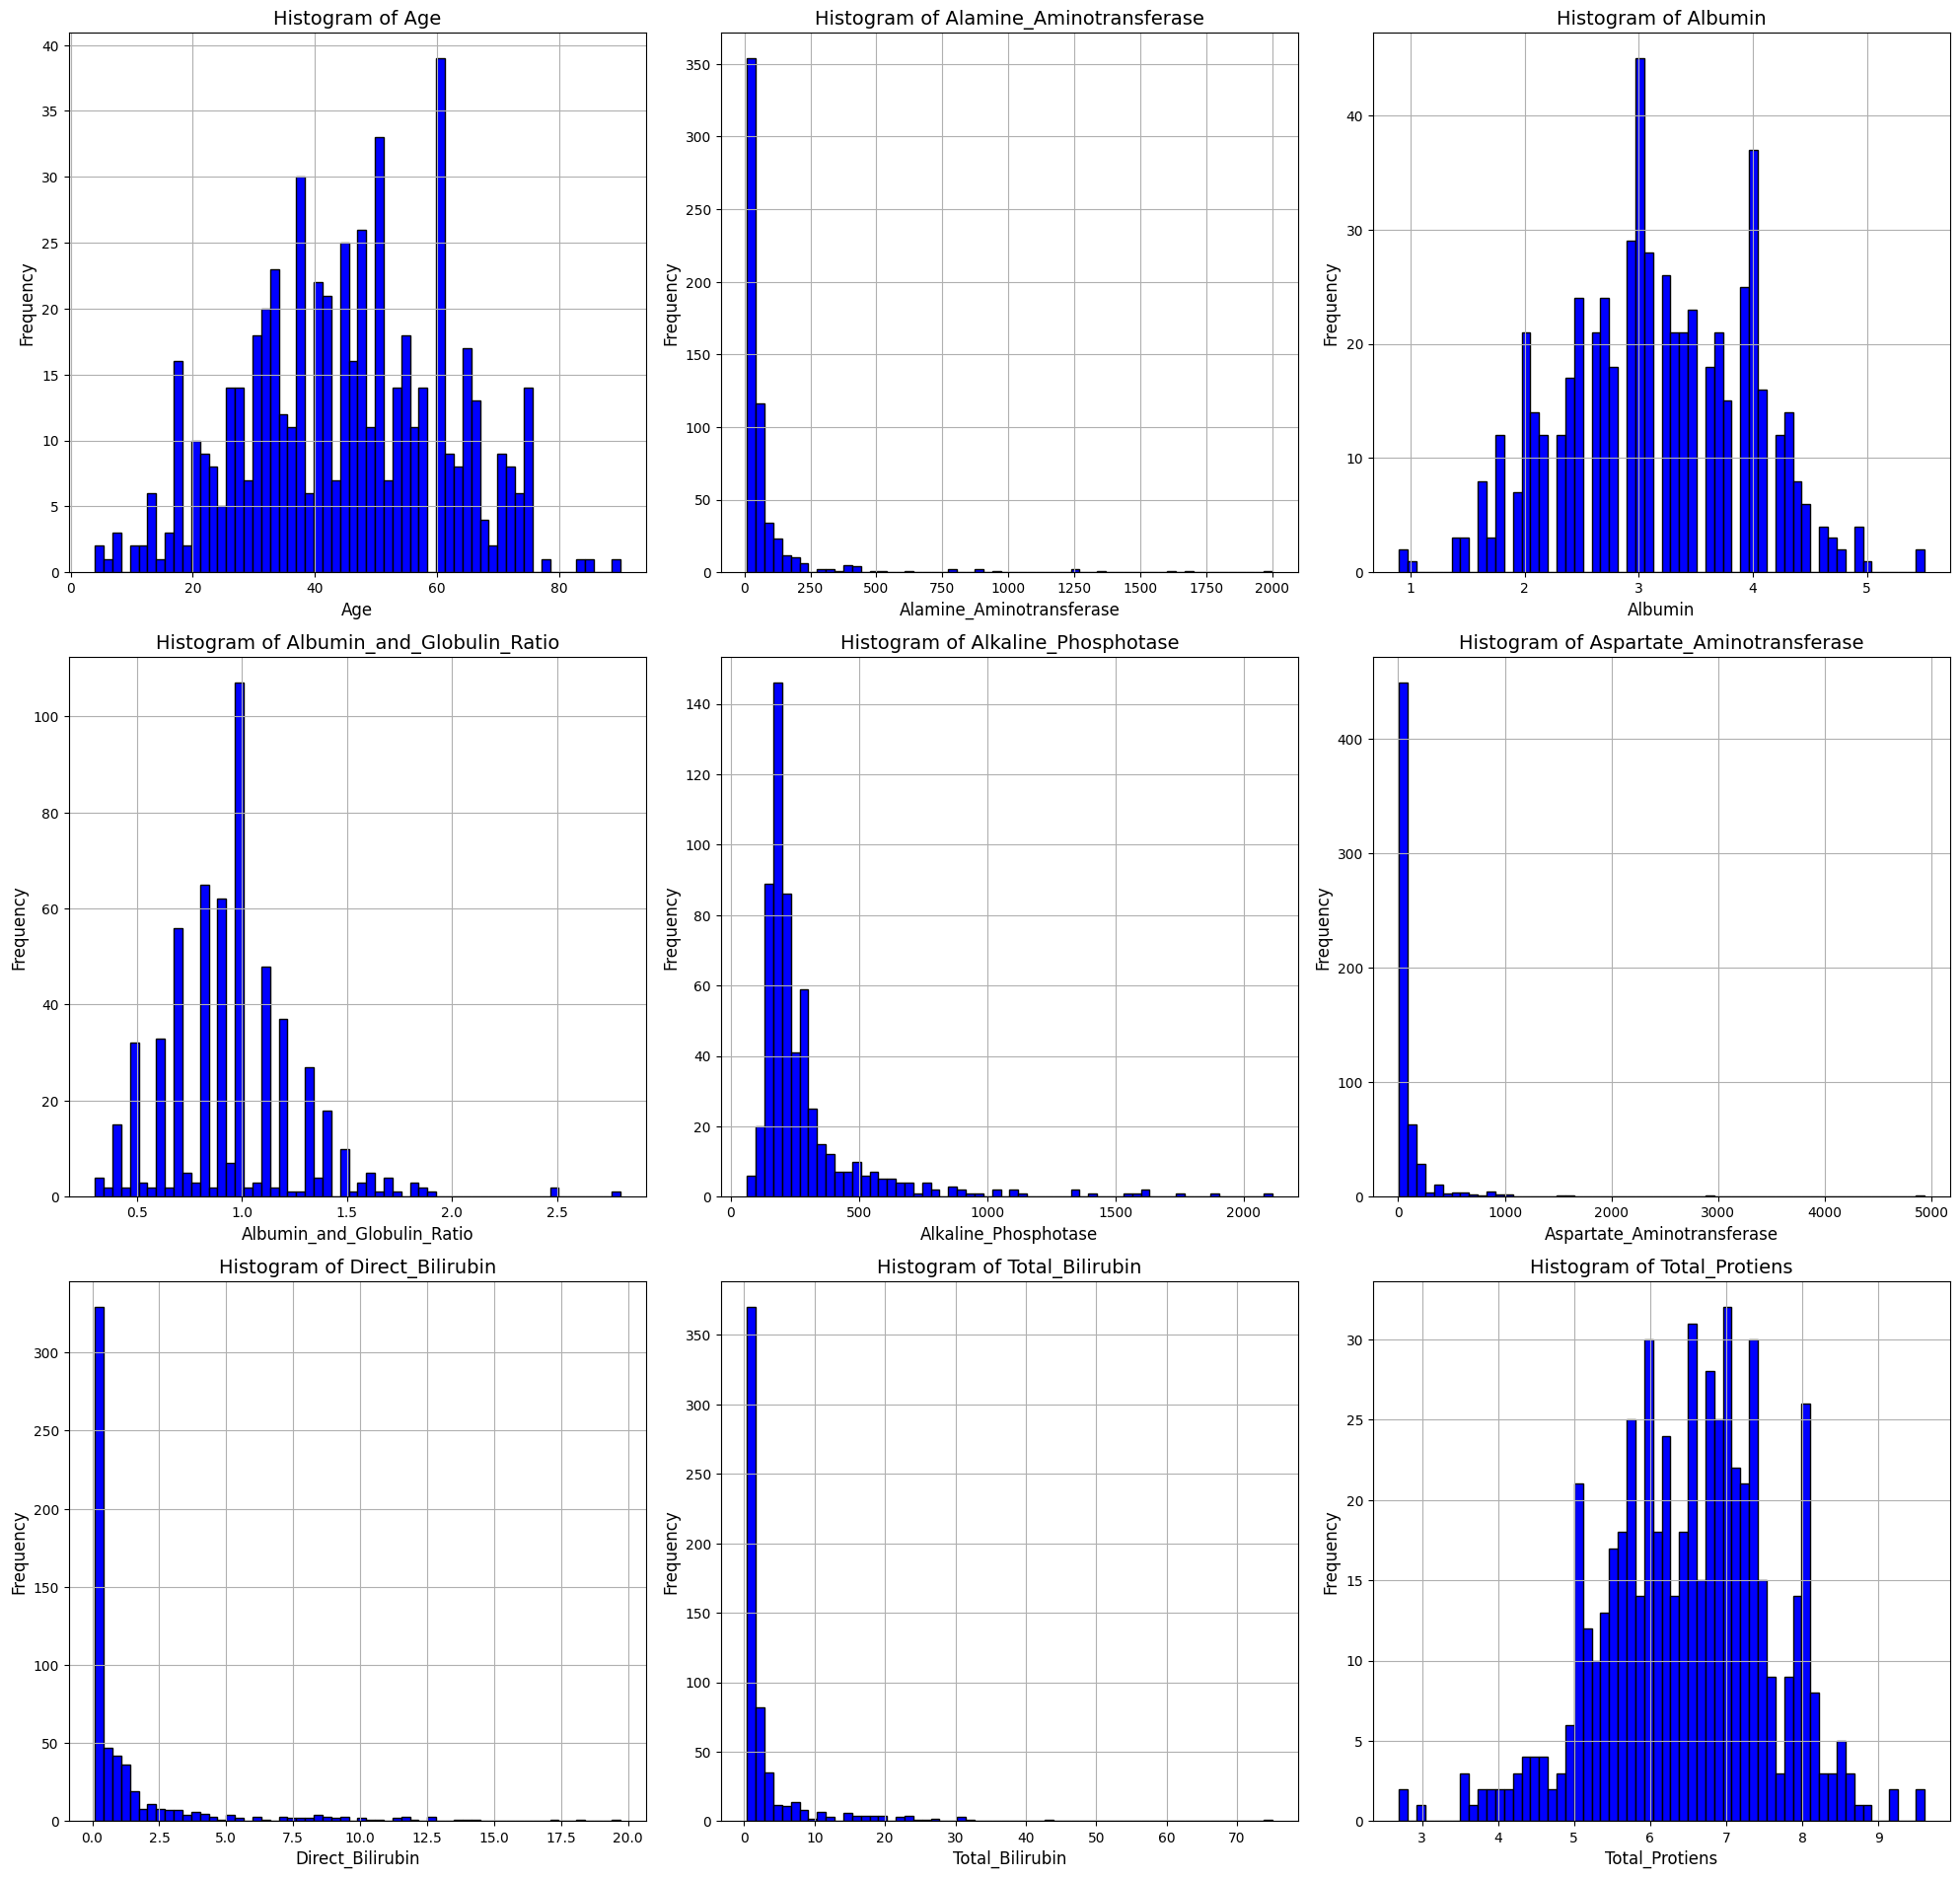

In [7]:
#Plotting histogram for numerical attributes
plt.figure(figsize=(20, 25))

hist_columns = df.columns.difference(['Gender', 'Dataset'])

for i, column in enumerate(hist_columns):
    plt.subplot(4, 3, i+1)
    df[column].hist(bins=60, color='blue', edgecolor='black')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Histogram of {column}', fontsize=14)

plt.tight_layout()
plt.show()

Creating ***countplot*** for each categorical feature allows us to visually represent the distribution of data, providing a graphical depiction of the count of data points within specific value ranges for each attribute.

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


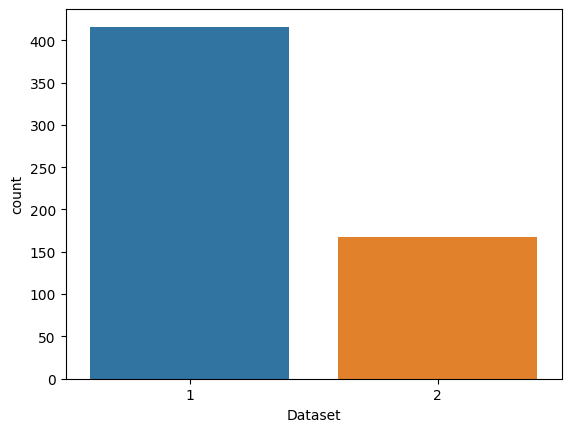

In [8]:
# Plotting countplot for categorical attribute - Dataset
sns.countplot(data=df, x = 'Dataset', label='Count')

ld, nld = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',ld)
print('Number of patients not diagnosed with liver disease: ',nld)

Number of male patients:  441
Number of female patients:  142


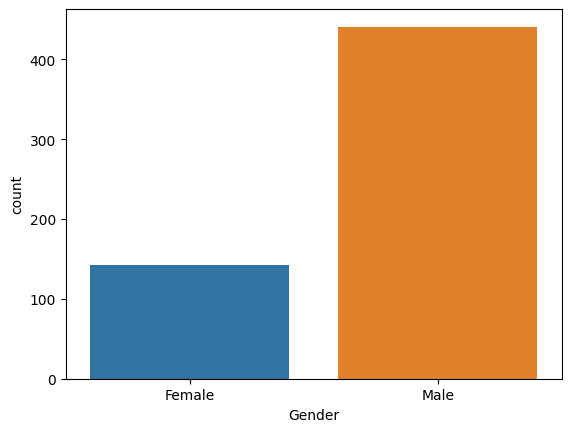

In [9]:
# Plotting countplot for categorical attribute - Gender
sns.countplot(data=df, x = 'Gender', label='Count')

m, f = df['Gender'].value_counts()
print('Number of male patients: ',m)
print('Number of female patients: ',f)

### **Special treatment needed for Albumin_and_Globulin Ratio**

We calculate the mean value of the column and then fill the missing values with the calculated mean.

In [10]:
# Filling the values with mean value
mean_value = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)

In [11]:
# Again checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


### **Special treatment needed for Gender**

As Gender is a categorical variable, we convert it into a numerical attribute using LabelEncoder

In [12]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

## **2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

### **PCC Table**

- It analyses the relationships between the data attributes.
- In our code, correlation matrix contains the PCC values between all pairs of continuous attributes. By using this matrix and the heatmap, we can identify which attributes have the strong positive and negative linear relationship.


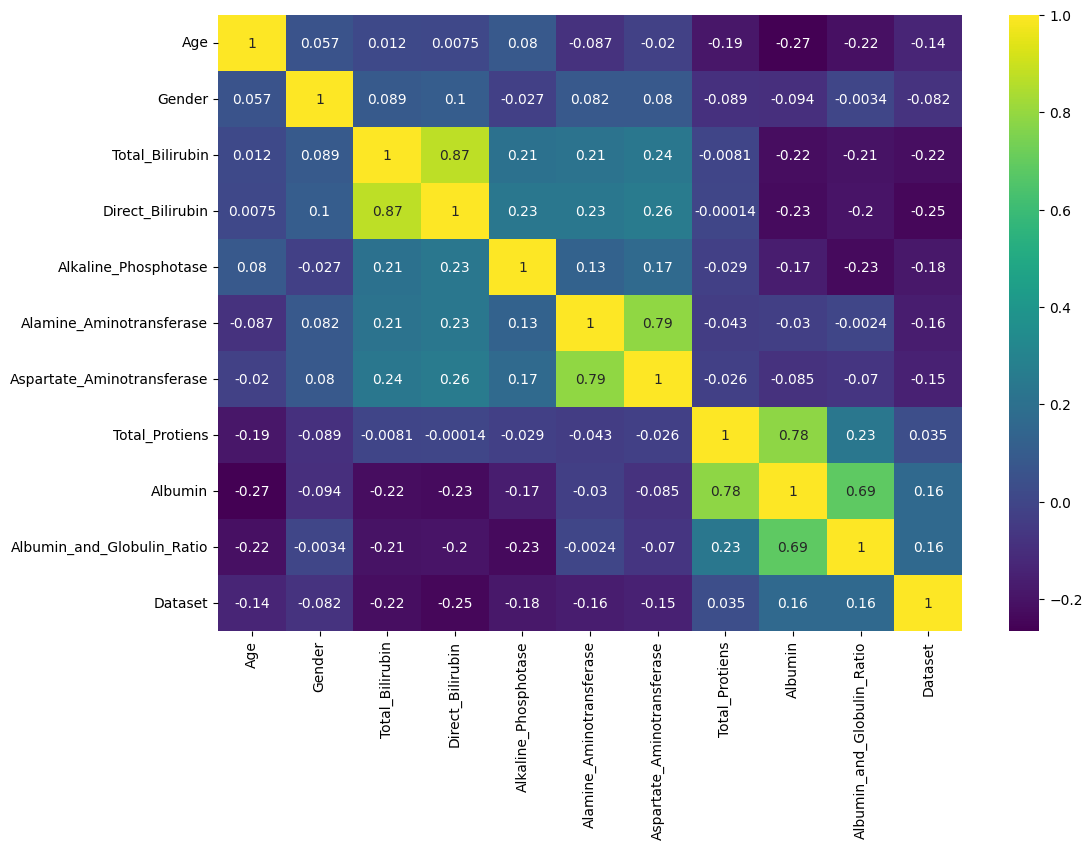

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.show()

### **Scatter Plots**
- Plotted the scatter plot for every attribute against each other.
- The primary purpose was to examine how each attribute correlates with the "dataset" variable and visualize their relationships.

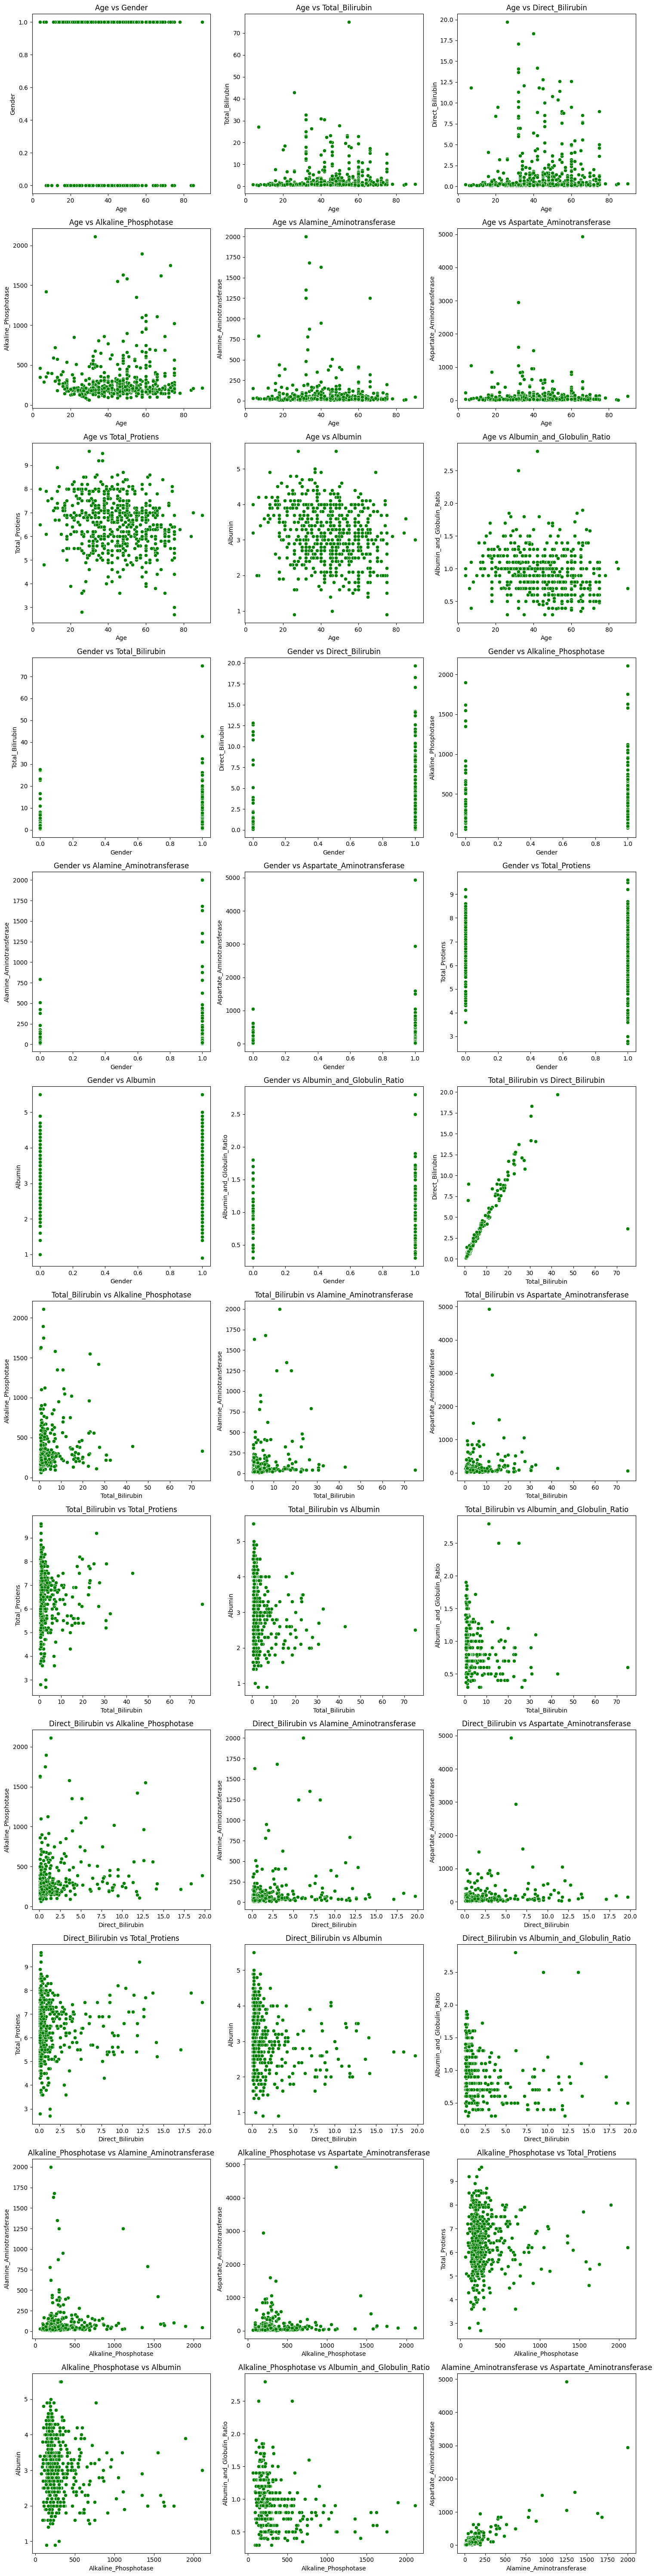

In [14]:
# Generating scatter plots for comparison of attributes
df_without_category = df.drop('Dataset', axis=1)

total_plots = (len(df_without_category.columns) - 1) * (len(df_without_category.columns) - 2) // 2
num_rows = total_plots // 3 + (total_plots % 3 > 0)

# Subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

plot_counter = 0
for i in range(0, len(df_without_category.columns) - 1):
    for j in range(i + 1, len(df_without_category.columns)):
        if plot_counter >= total_plots:
            break
        sns.scatterplot(x=df_without_category.iloc[:, i], y=df_without_category.iloc[:, j], ax=axes[plot_counter], color='green')
        axes[plot_counter].set_title(f'{df_without_category.columns[i]} vs {df_without_category.columns[j]}', fontsize=12)
        plot_counter += 1

for ax in axes[plot_counter:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


**Observations made from PCC table and scatter plots**

- We can see that Direct_Bilirubin and Total_Bilirubin; Alamine Aminotransferase and Aspartate Aminotransferase; Total Protiens and Albumin are highly correlated positively.


- When we compare the effect of the attributes on our label "Dataset", we find that Direct_Bilirubin (corr = -0.25) has the most influence on whether a person has a liver disease or not.


- Other influential attributes on the label are - Total_Bilirubin, Alamine Aminotransferase, and Albumin.


- The attributes having a very low correlation with the label can be dropped before training the model as they will not have significant influence on the prediction. In this case, Gender and Total_Proteins can be dropped.

## **3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset.**

### **Splitting the data into testing, validation and training**

- In the first split, 60% of the data is allocated to the training set, while the remaining 40% (comprising both validation and test data) is grouped together.
- Following this, the combined validation and test data is further split and approximately 20% of the total data is assigned to each of the validation and test sets.

In [15]:
train_data = 0.6
val_data = 0.2
test_data = 0.2

# Splitting the data into training (60%) and test data
train_data, test_val_data = train_test_split(df, test_size=val_data + test_data, random_state=42)

# Splitting test data into validation data (20%)
test_data, val_data = train_test_split(test_val_data, test_size=test_data / (val_data + test_data), random_state=42)

Initializing X_train, y_train, X_test, y_test, X_val, y_val

In [16]:
# Dropping irrelevant features that were
df = df.drop(['Gender', 'Total_Protiens'], axis=1)

attributes = df.columns[:-1]

X_train = train_data[attributes]
y_train = train_data['Dataset']

X_test = test_data[attributes]
y_test = test_data['Dataset']

X_val = val_data[attributes]
y_val = val_data['Dataset']

### **Verification of Splitting**


**1st Method**
*   We calculate the total number of rows in the training, validation and test dataset.
*   We then compare the proportion of rows to the total number of rows in the entire dataset to verify whether the dataset is split properly into the required subsets.



In [19]:
# Calculate the total number of rows in each set
total_rows_train = train_data.shape[0]
total_rows_val = val_data.shape[0]
total_rows_test = test_data.shape[0]

# Calculate the total number of rows in the dataset
total_rows = df.shape[0]

# Calculate the proportions for each subset
proportion_train = total_rows_train / total_rows
proportion_val = total_rows_val / total_rows
proportion_test = total_rows_test / total_rows

print(f"Total rows in the entire data: {total_rows}")

print(f"Proportion of Training Set: {proportion_train:.2%}")
print(f"Proportion of Validation Set: {proportion_val:.2%}")
print(f"Proportion of Testing Set: {proportion_test:.2%}")


Total rows in the entire data: 583
Proportion of Training Set: 59.86%
Proportion of Validation Set: 20.07%
Proportion of Testing Set: 20.07%


**2nd Method**

- We calculate the mean for each given attribute in the Validation and testing sets.
- If we get similar and almost identical means as compared with the entire data, it verifies that it is split correctly.

In [ ]:
data_means = df[attributes].mean()
val_means = val_data[attributes].mean()
test_means = test_data[attributes].mean()

# Compare the means
mean_comparison = pd.DataFrame({
    'Attribute': attributes,
    'Dataset Mean': data_means,
    'Validation Mean': val_means,
    'Testing Mean': test_means
})

mean_comparison.set_index('Attribute', inplace=True)

# Print the table
print(mean_comparison)

                            Dataset Mean  Validation Mean  Testing Mean
Attribute                                                              
Age                            44.746141        43.555556     46.299145
Total_Bilirubin                 3.298799         3.252137      3.632479
Direct_Bilirubin                1.486106         1.554701      1.681197
Alkaline_Phosphotase          290.576329       296.547009    332.170940
Alamine_Aminotransferase       80.713551        95.213675     70.068376
Aspartate_Aminotransferase    109.910806       116.000000    104.145299
Albumin                         3.141852         3.105128      3.058974
Albumin_and_Globulin_Ratio      0.947064         0.923540      0.892137
Dataset                         1.286449         1.290598      1.247863


**3rd Method**


- We generate a set of four histograms, each representing the distribution of the 'Dataset' category across different subsets of the data.
- By visually comparing these histograms, we can verify if the test and validation portions are representative of the entire dataset.

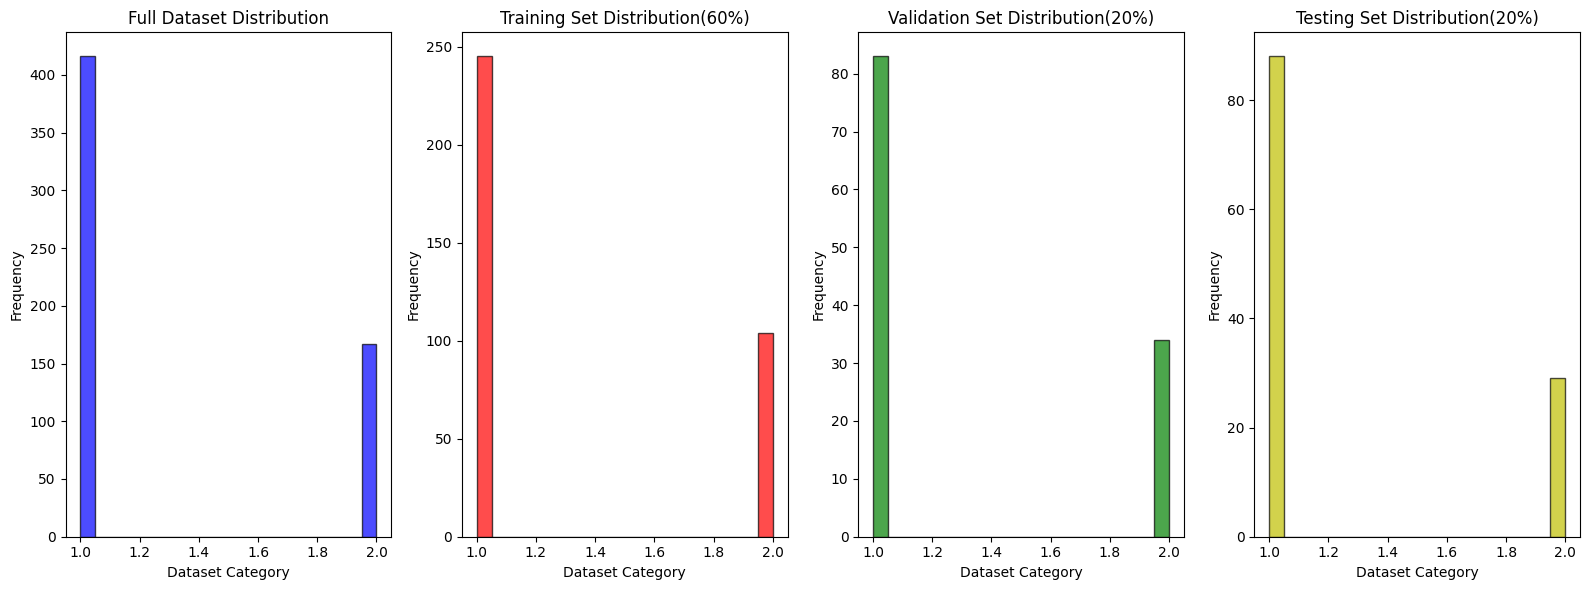

In [ ]:
#Plotting the graph for verification purpose test and validation portions of the data are representative of the entire dataset.
plt.figure(figsize=(16, 6))

# Full dataset
plt.subplot(1, 4, 1)
plt.title('Full Dataset Distribution')
plt.hist(df['Dataset'], bins=20, alpha=0.7, color='b', edgecolor='black')
plt.xlabel('Dataset Category')
plt.ylabel('Frequency')

# Training set
plt.subplot(1, 4, 2)
plt.title('Training Set Distribution(60%)')
plt.hist(y_train, bins=20, alpha=0.7, color='r', edgecolor='black')
plt.xlabel('Dataset Category')
plt.ylabel('Frequency')

# Validation set
plt.subplot(1, 4, 3)
plt.title('Validation Set Distribution(20%)')
plt.hist(y_val, bins=20, alpha=0.7, color='g', edgecolor='black')
plt.xlabel('Dataset Category')
plt.ylabel('Frequency')

# Testing set
plt.subplot(1, 4, 4)
plt.title('Testing Set Distribution(20%)')
plt.hist(y_test, bins=20, alpha=0.7, color='y', edgecolor='black')
plt.xlabel('Dataset Category')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## **4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters:**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

## **A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.**

**Multinomial Logistic Regression**:

- A grid search is conducted, exploring hyperparameters such as C (regularization strength), solver, and max_iter (maximum number of iterations).
- The best classifier and hyperparameters are determined through cross-validation.
- The code calculates and reports performance metrics for training, validation, and testing sets.
- The impacts of different hyperparameters on accuracy are visualized through line graphs.

### Trying different hyperparameters - C, solver, max number of iterations

Hyperparameters used in Multinomial Logistic Regression:

**Regularization Strength (C or alpha)**: This hyperparameter controls the amount of regularization applied to the model. Regularization helps prevent overfitting. A smaller value of C or a larger value of alpha increases the strength of regularization.

**Solver Algorithm**: There are different optimization algorithms used to estimate the model's parameters (coefficients). Common options include "newton-cg," "lbfgs," "liblinear", "sag" and "saga". The choice of solver can affect the training time and the model's accuracy.

**Maximum Iterations**: This hyperparameter defines the maximum number of iterations the optimization algorithm can take to converge.

In [ ]:
param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 50, 100, 500, 1000]
}

### Implementing the model using Gridsearch

In [ ]:
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_classifier_lr = grid_search.best_estimator_
best_hyperparameters_lr = grid_search.best_params_

In [ ]:
y_train_pred_lr = best_classifier_lr.predict(X_train)
y_val_pred_lr = best_classifier_lr.predict(X_val)
y_test_pred_lr = best_classifier_lr.predict(X_test)

# Print Best Hyperparameters
print("Best Hyperparameters:", best_hyperparameters_lr)

Best Hyperparameters: {'C': 0.1, 'max_iter': 50, 'solver': 'lbfgs'}


### Defining a function that calculates the classification accuracy, precision, recall and F1 score.

In [ ]:
# Calculate and print metrics
def evaluate_classifier(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{label} Accuracy: {accuracy:.4f}")
    print(f"{label} Precision: {precision:.4f}")
    print(f"{label} Recall: {recall:.4f}")
    print(f"{label} F1 Score: {f1:.4f}")

### Reporting Training performance

In [ ]:
# Evaluate on training set
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.7192
Training Precision: 0.6894
Training Recall: 0.7192
Training F1 Score: 0.6706


### Reporting Validation performance

In [ ]:
# Evaluate on validation set
evaluate_classifier(y_val, y_val_pred_lr, "Validation")

Validation Accuracy: 0.7350
Validation Precision: 0.7109
Validation Recall: 0.7350
Validation F1 Score: 0.6907


### Reporting Testing performance

In [ ]:
# Evaluate on test set
evaluate_classifier(y_test, y_test_pred_lr, "Testing")

Testing Accuracy: 0.7607
Testing Precision: 0.7295
Testing Recall: 0.7607
Testing F1 Score: 0.7314


### Confusion matrix for Test Data

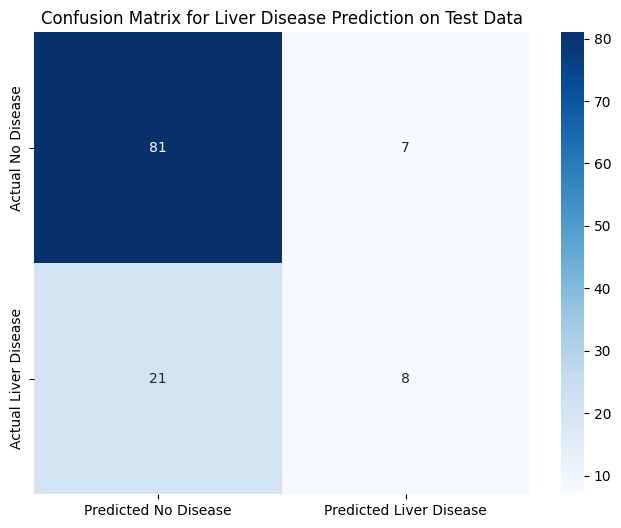

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred_lr)

# Create a heatmap for the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Test Data')
plt.show()

### Confusion Matrix for Validation Data

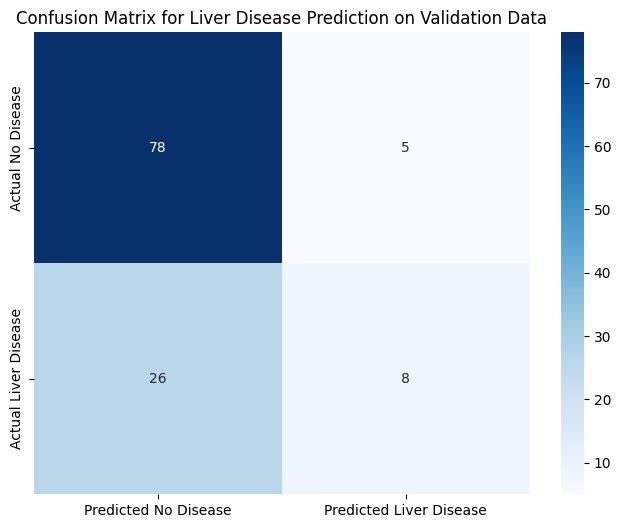

In [ ]:
conf_mat = confusion_matrix(y_val, y_val_pred_lr)

# Create a heatmap for the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Validation Data')
plt.show()

### Discussion on the impact of different hyper parameters

- We have tried all the different values of hyperparameters using Gridsearch and obtained the best combination while training the above model, but now we will try to manually understand the impact of different hyperparameters by training the model again.

#### Hyperparameter - C

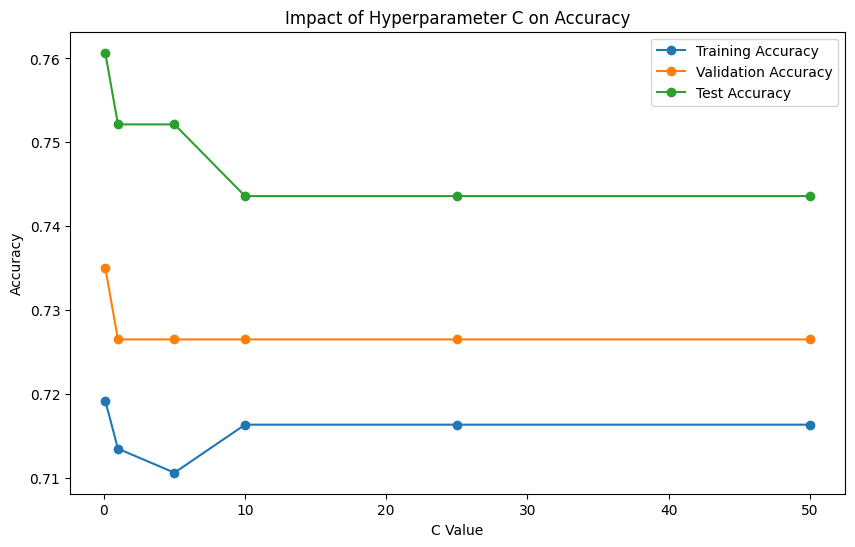

In [ ]:
# Define the range of C values you want to visualize
C_values = [0.1, 1.0, 5.0, 10.0, 25.0, 50.0]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different C values
for c in C_values:
    # Train the model with the specified C value
    lr_model = LogisticRegression(multi_class='multinomial', C=c, solver='lbfgs', max_iter=1000)
    lr_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()
plt.show()

**Observations**

For different values of C - [0.1, 1.0, 5.0, 10.0, 25.0, 50.0]
1.  A general trend is that as the value of C increases, the accuracy of all the subsets decreases.
2. Based on this graph, a C value around 0.1 might be a good choice for the final model. It provides a good balance between model complexity and generalization.
3. There is a significant gap between training and validation/test accuracies, which suggests overfitting.
4. As the value of C increases, the accuracy of the model pretty much remains the same for each of the subset.

#### Hyperparameter - Solver

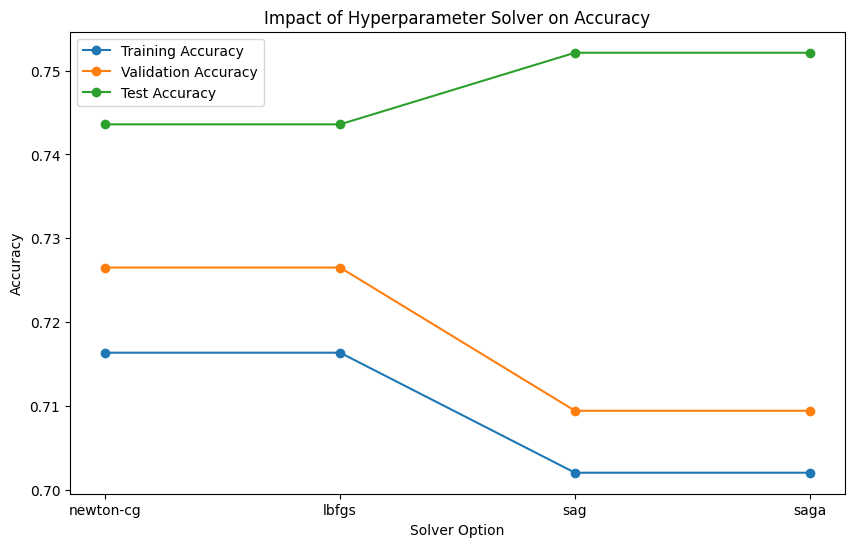

In [ ]:
# Define the solver options
solver_options = ['newton-cg', 'lbfgs', 'sag', 'saga']

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different solver options
for solver_option in solver_options:
    # Train the model with the specified solver option
    lr_model = LogisticRegression(multi_class='multinomial', C=10.0, solver=solver_option, max_iter=1000)
    lr_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solver_options, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(solver_options, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(solver_options, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Solver Option')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Solver on Accuracy')
plt.legend()

plt.show()


**Observations**

For different values of Solver - ['newton-cg', 'lbfgs', 'sag', 'saga']

1. 'newton-cg' and 'lbfgs' perform similarly and provide the highest accuracy for training and validation.
2. 'sag' and 'saga' performs slightly worse in terms of training and validation accuracy, but surprisingly performs well for test data.
3. Based on this analysis, 'newton-cg' and 'lbfgs' seem to be the most suitable solver options for this logistic regression model.
4. In this specific case, the choice of solver does not have a significant impact on the model's performance

#### Hyperparameter - Max number of iterations.

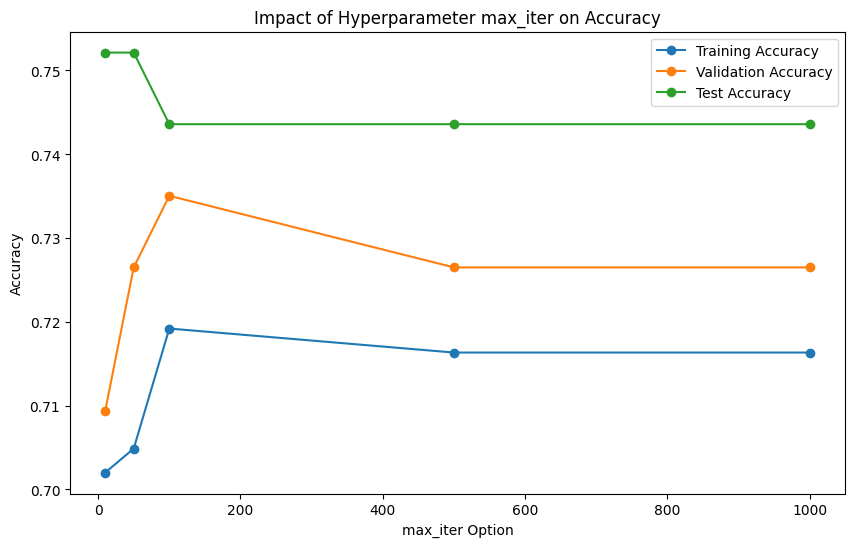

In [ ]:
# Define the max_iter options
max_iter_options = [10, 50, 100, 500, 1000]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different max_iter options
for max_iter_option in max_iter_options:
    # Train the model with the specified max_iter option
    lr_model = LogisticRegression(multi_class='multinomial', C=10.0, solver='lbfgs', max_iter=max_iter_option)
    lr_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_options, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_iter_options, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(max_iter_options, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('max_iter Option')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter max_iter on Accuracy')
plt.legend()

plt.show()

**Observations**

For the max number of iterations - [10, 50, 100, 500, 1000]

1. As max_iter increases, the training and validation accuracy generally increases.
2. After attaining a maximum number of iterations of 100, the model yields almost a similar accuracy for all the three subsets.
3. The model appears to converge well even with a relatively low number of iterations - 50.
4. After a certain number of iterations, the additional computational cost used for more iterations may not justify the marginal increase in accuracy.

## **B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**

**Support Vector Machines (SVM) Classifer**:

Grid search is employed to explore hyperparameters including C (regularization parameter), kernel (choice of kernel function), degree (degree of polynomial kernel), and gamma (kernel coefficient).

The best classifier and hyperparameters are identified.

Performance metrics are calculated and reported for each dataset (training, validation, testing).

### Trying different hyperparameters -  C, kernel, degree of polynomial kernel, gamma

**C (Regularization Parameter)**: Controls the trade-off between correct classification of training examples and maximizing the decision function’s margin. Higher values of C allow for more complex decision boundaries.

**Kernel**: Specifies the type of hyperplane used to separate the data. Options include linear, polynomial, radial basis function (RBF), and sigmoid, each suited for different data distributions.

**Degree (for polynomial kernel)**: Only applicable when using a polynomial kernel. It determines the degree of the polynomial hyperplane.

**Gamma**: Defines the reach or influence of a single training example. Low values mean samples have a far reach, while high values make them more influential.

In [ ]:
param_grid_svm = {
    'C': [0.1, 1.0, 5.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

### Implementing the model using Gridsearch

In [ ]:
# Initialize the GridSearchCV object for SVM
grid_search_svm = GridSearchCV(SVC(probability = True), param_grid_svm, cv = 3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 5.0, 10.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
# Get the best classifier and hyperparameters
best_classifier_svm = grid_search_svm.best_estimator_
best_hyperparameters_svm = grid_search_svm.best_params_

print("Best Hyperparameters for SVM:", best_hyperparameters_svm)

Best Hyperparameters for SVM: {'C': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# Predictions and evaluation
y_train_pred_svc = best_classifier_svm.predict(X_train_scaled)
y_val_pred_svc = best_classifier_svm.predict(X_val_scaled)
y_test_pred_svc = best_classifier_svm.predict(X_test_scaled)

### Reporting Training performance

In [ ]:
# Evaluate on training set
evaluate_classifier(y_train, y_train_pred_svc, "Training")

Training Accuracy: 0.7106
Training Precision: 0.7951
Training Recall: 0.7106
Training F1 Score: 0.5987


### Reporting Validation performance

In [ ]:
# Evaluate on validation set
evaluate_classifier(y_val, y_val_pred_svc, "Validation")

Validation Accuracy: 0.7009
Validation Precision: 0.6230
Validation Recall: 0.7009
Validation F1 Score: 0.6119


### Reporting Test performance

In [ ]:
# Evaluate on test set
evaluate_classifier(y_test, y_test_pred_svc, "Testing")

Testing Accuracy: 0.7265
Testing Precision: 0.5608
Testing Recall: 0.7265
Testing F1 Score: 0.6330


### Confusion matrix for Test Data

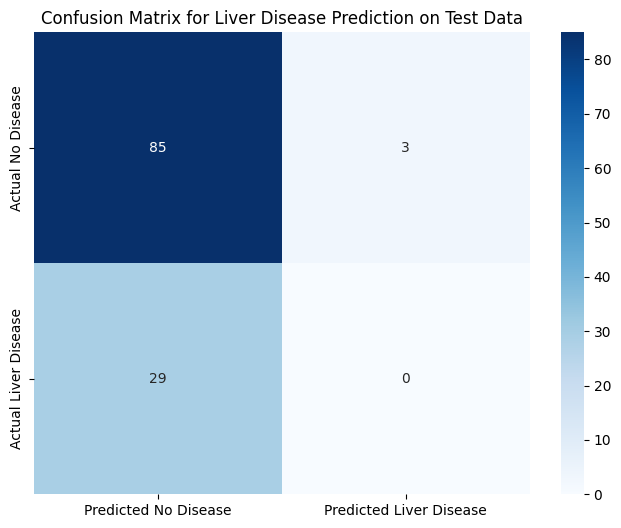

In [ ]:
# Confusion Matrix and Heatmap for Test Set
conf_mat = confusion_matrix(y_test, y_test_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Test Data')
plt.show()

### Confusion matrix for Validation Data

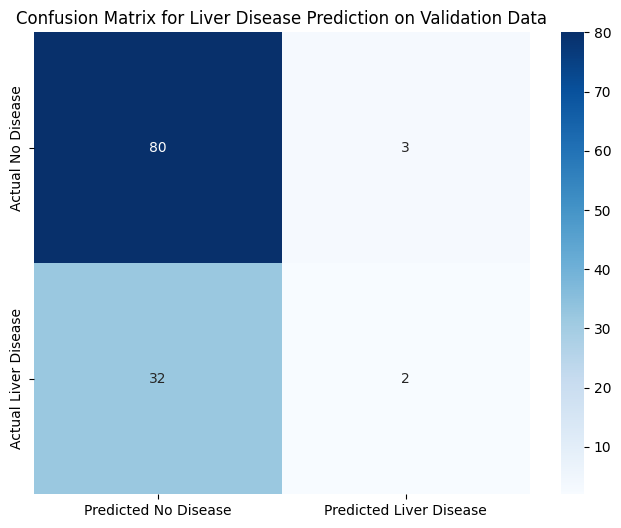

In [ ]:
# Confusion Matrix and Heatmap for Validation Set
conf_mat = confusion_matrix(y_val, y_val_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Validation Data')
plt.show()

### Discussing Impact of hyperparameters

### Impact of hyperparameter - C

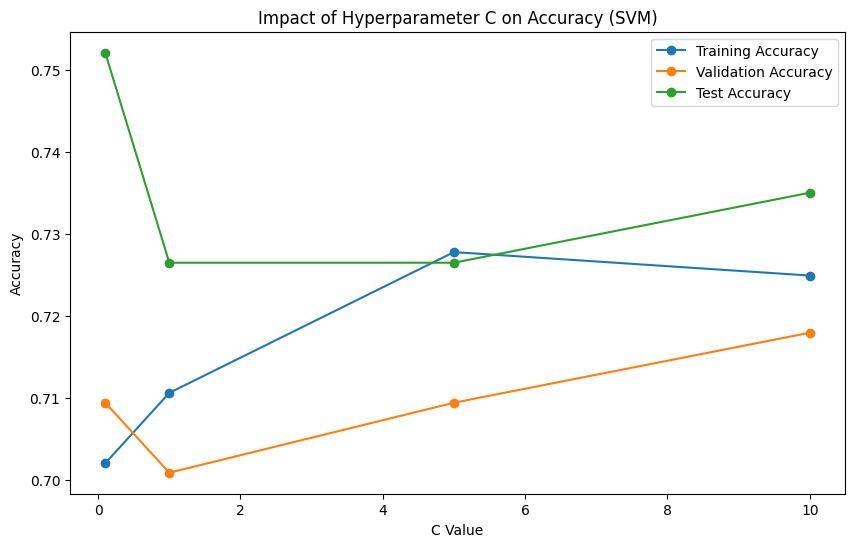

In [ ]:
# Define the range of C values you want to visualize
C_values = [0.1, 1.0, 5.0, 10.0]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different C values
for c in C_values:
    # Train the model with the specified C value
    svm_model = SVC(C=c, kernel='poly', gamma='scale')
    svm_model.fit(X_train_scaled, y_train)

    # Predict on different sets
    y_train_pred = svm_model.predict(X_train_scaled)
    y_val_pred = svm_model.predict(X_val_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy (SVM)')
plt.legend()
plt.show()


**Observations**

For the values of C - [0.1, 1.0, 5.0, 10.0]

1. As C increases, the training accuracy generally improves. This indicates that with higher regularization (smaller C), the model is more prone to underfitting, while lower regularization (larger C) allows the model to better fit the training data.
2. The validation accuracy increases exponentially with higher values of C.
3. For smaller values of C, the test set yields a higher accuracy, and almost stays the same for higher values of C.

### Impact of hyperparameter - Kernel

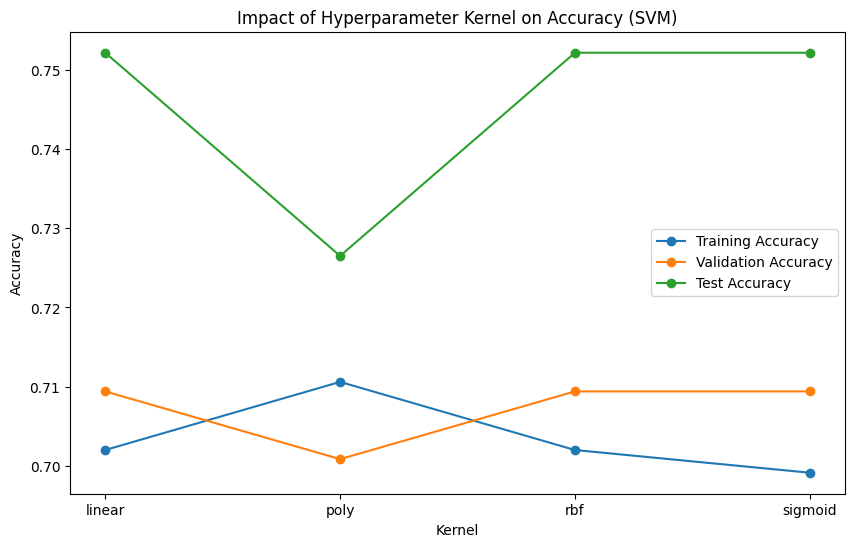

In [ ]:
# Define the kernels to visualize
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different kernels
for kernel in kernels:
    # Train the model with the specified kernel
    svm_model = SVC(C=1.0, kernel=kernel, gamma='scale')
    svm_model.fit(X_train_scaled, y_train)

    # Predict on different sets
    y_train_pred = svm_model.predict(X_train_scaled)
    y_val_pred = svm_model.predict(X_val_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(kernels, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(kernels, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(kernels, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Kernel on Accuracy (SVM)')
plt.legend()
plt.show()


**Observations**

For kernel values - ['linear', 'poly', 'rbf', 'sigmoid']

1. The SVM model performs the best of training set for polynomial kernel but a sharp spike decrease in accuracy is seen on validation and test set.
2. On the rest of the kernels, the test accuracy remains the same.
3. There is a tradeoff between training and validation accuracy for all the types of kernels.

### Impact of hyperparameter - Degree of Polynomial Kernel

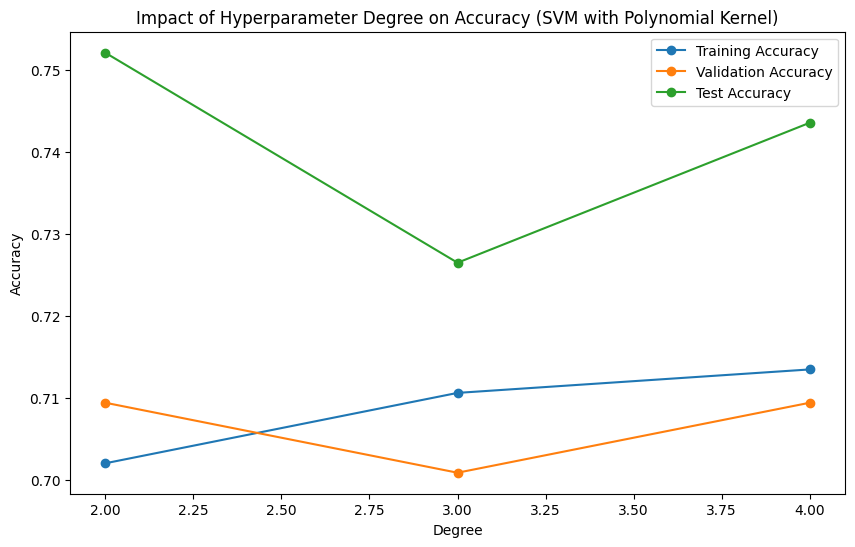

In [ ]:
# Define the degrees to visualize
degrees = [2, 3, 4]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different degrees
for degree in degrees:
    # Train the model with the specified degree
    svm_model = SVC(C=1.0, kernel='poly', degree=degree, gamma='scale')
    svm_model.fit(X_train_scaled, y_train)

    # Predict on different sets
    y_train_pred = svm_model.predict(X_train_scaled)
    y_val_pred = svm_model.predict(X_val_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(degrees, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(degrees, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Degree on Accuracy (SVM with Polynomial Kernel)')
plt.legend()
plt.show()


**Observations**

For degrees = [2, 3, 4]

1. As the degree of the polynomial increases, the training accuracy also tends to increase. This suggests that higher-degree polynomial kernels are better at capturing complex relationships in the data.
2. However, a polynomial of degree 3 shows a decrease in accuracy for the test set and the degrees 2 and 4 fit the set well.
3. The validation set also experiences a drop in accuracy for the polynomial degree of 3, and hence the model yields the best accuracy with a degree of 2.

## **C.Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.**

**Random Forest Classifier**:

Grid search explores hyperparameters such as the number of trees (n_estimators), max_depth, min_samples_split, and min_samples_leaf.
Best classifier and hyperparameters are determined via cross-validation.

Performance metrics for training, validation, and testing are reported.

Feature importance is analysed with the help of horizontal bar charts.

### Trying different hyperparameters - the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [ ]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

### Implementing the model using Gridsearch

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

best_classifier_rf = grid_search_rf.best_estimator_
best_hyperparameters_rf = grid_search_rf.best_params_

# Print Best Hyperparameters
print("Best Hyperparameters:", best_hyperparameters_rf)

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


### Analysing Feature Importance

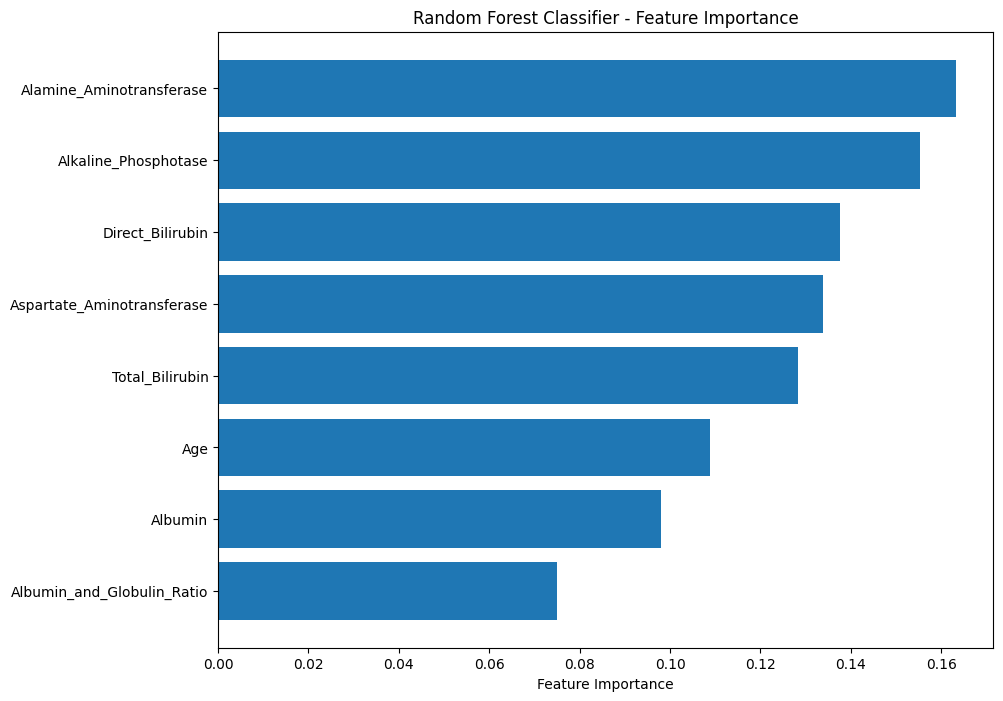

In [ ]:
# Feature Importance
feature_importance = best_classifier_rf.feature_importances_
sorted_idx = feature_importance.argsort()

# Plot Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [attributes[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

- It is observed that Alamine_Aminotransferase and Alkaline_Phosphate are the two most important features that contribute to building the Random Forest Classifier.

In [ ]:
# Predictions and evaluation
y_train_pred_rf = best_classifier_rf.predict(X_train_scaled)
y_val_pred_rf = best_classifier_rf.predict(X_val_scaled)
y_test_pred_rf = best_classifier_rf.predict(X_test_scaled)

### Reporting Training performance

In [ ]:
# Evaluate on training set
evaluate_classifier(y_train, y_train_pred_rf, "Training")

Training Accuracy: 0.8539
Training Precision: 0.8562
Training Recall: 0.8539
Training F1 Score: 0.8447


### Reporting Validation performance

In [ ]:
# Evaluate on validation set
evaluate_classifier(y_val, y_val_pred_rf, "Validation")

Validation Accuracy: 0.7265
Validation Precision: 0.7481
Validation Recall: 0.7265
Validation F1 Score: 0.7340


### Reporting Test performance

In [ ]:
# Evaluate on test set
evaluate_classifier(y_test, y_test_pred_rf, "Testing")

Testing Accuracy: 0.7009
Testing Precision: 0.6404
Testing Recall: 0.7009
Testing F1 Score: 0.6604


### Confusion Matrix on Test Data

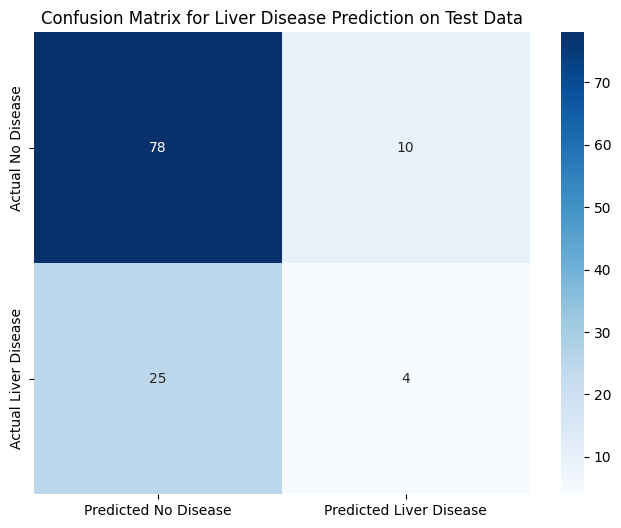

In [ ]:
# Confusion Matrix and Heatmap for Test Set
conf_mat = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Test Data')
plt.show()

### Confusion Matrix on Validation Data

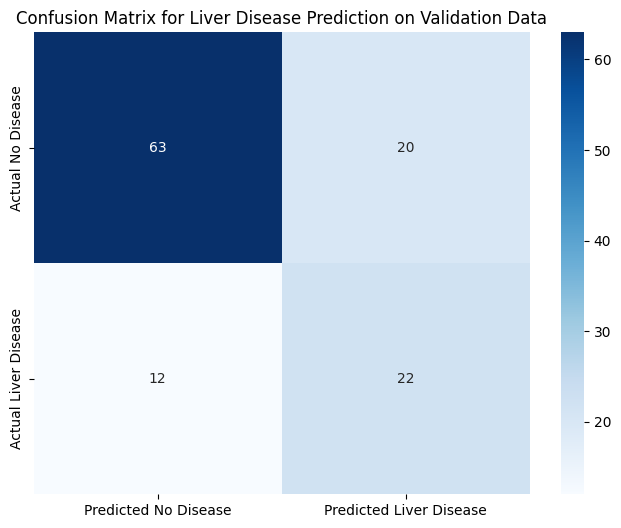

In [ ]:
# Confusion Matrix and Heatmap for Validation Set
conf_mat = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Liver Disease'],
            yticklabels=['Actual No Disease', 'Actual Liver Disease'])
plt.title('Confusion Matrix for Liver Disease Prediction on Validation Data')
plt.show()

## Discussing Impact of Hyperparameters

### Impact of Hyperparameter - Number of trees

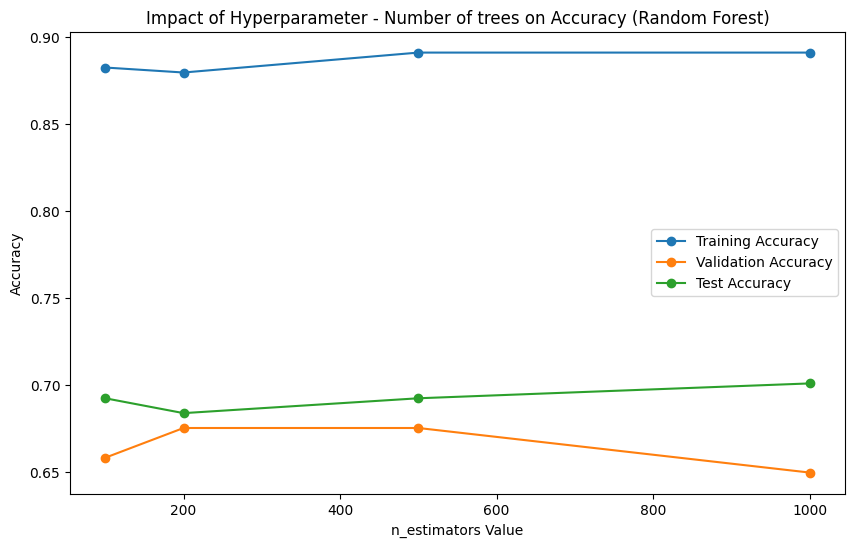

In [ ]:
n_estimators_values = [100, 200, 500, 1000]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different n_estimators values
for n_estimators_value in n_estimators_values:
    # Train the model with the specified n_estimators value
    rf_model = RandomForestClassifier(n_estimators=n_estimators_value, max_depth=6, min_samples_split=4, min_samples_leaf=2)
    rf_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(n_estimators_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter - Number of trees on Accuracy (Random Forest)')
plt.legend()
plt.show()


**Observations**

For Number of trees - [100, 200, 500, 1000]

1. As the number of trees (n_estimators) increases, the training accuracy tends to remain the same. This suggests that an ensemble of more trees tends to overfit.
2. There is a significant difference in the accuracies of training set as compared to validation and test. This is because Random forest fits the data well on training set.
3. Optimal result is obtained at 500 trees where the accuracy obtained is the best for all the three sets.

### Impact of Hyperparameter - Max depth

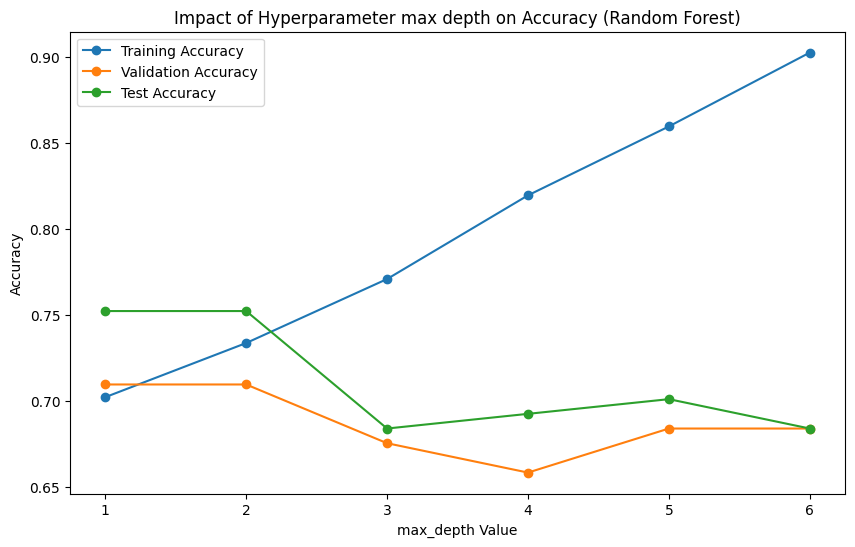

In [ ]:
max_depth_values = list(range(1, 7))

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth_value in max_depth_values:
    # Train the model with the specified max_depth value
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=max_depth_value, min_samples_split=2, min_samples_leaf=1)
    rf_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('max_depth Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter max depth on Accuracy (Random Forest)')
plt.legend()
plt.show()


**Observations**

For max_depth_values 1 to 6

1. As the maximum depth of the trees increases, the training accuracy tends to improve exponentially. This is expected, as deeper trees can better fit the training data, potentially leading to overfitting.
2. The trend in validation accuracy stabilizes, but after a certain point (around max_depth = 3 or 4), it slightly decreases and then increases again.
3. As the depth increases, the test set accuracy decreases due to the overfitting.

### Impact of Hyperparameter -  Minimum number of samples required to split an internal node

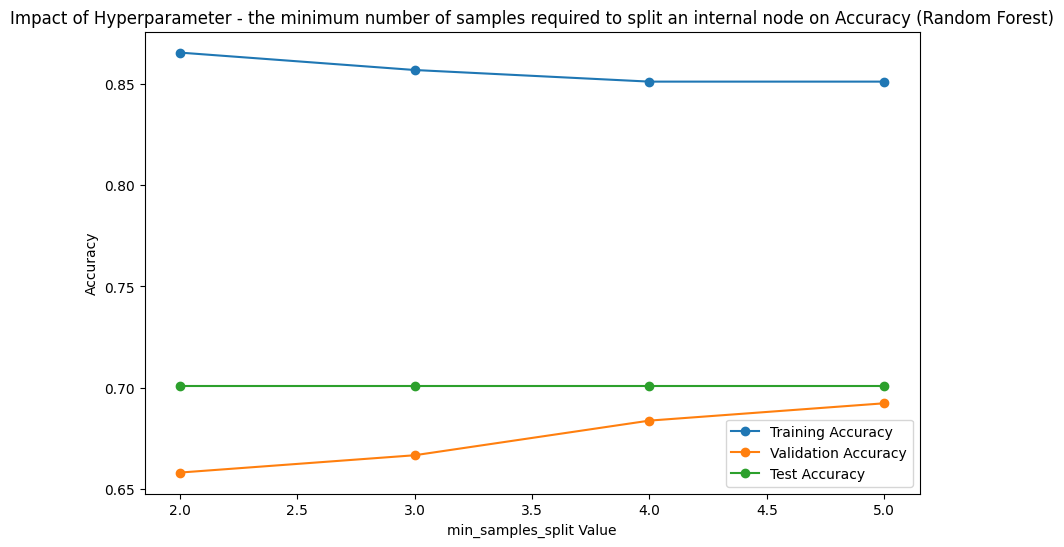

In [ ]:
min_samples_split_values = [2, 3, 4, 5]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split_value in min_samples_split_values:
    # Train the model with the specified min_samples_split value
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=min_samples_split_value, min_samples_leaf=1)
    rf_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(min_samples_split_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_split Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter - the minimum number of samples required to split an internal node on Accuracy (Random Forest)')
plt.legend()
plt.show()


**Observations**

For the minimum samples required to split an internal nodes - [2,3,4,5]

1. The training accuracy tends to decrease as the minimum samples required to split an internal node increases.
2. The validation accuracy increases when the samples increase, whereas the test accuracy remains same irresepective of the sample size.
3. This suggests that when nodes are required to have a higher number of samples to split, the model becomes less complex and less prone to overfitting.

### Impact of hyperparameter - Minimum number of samples required to be at a leaf node.

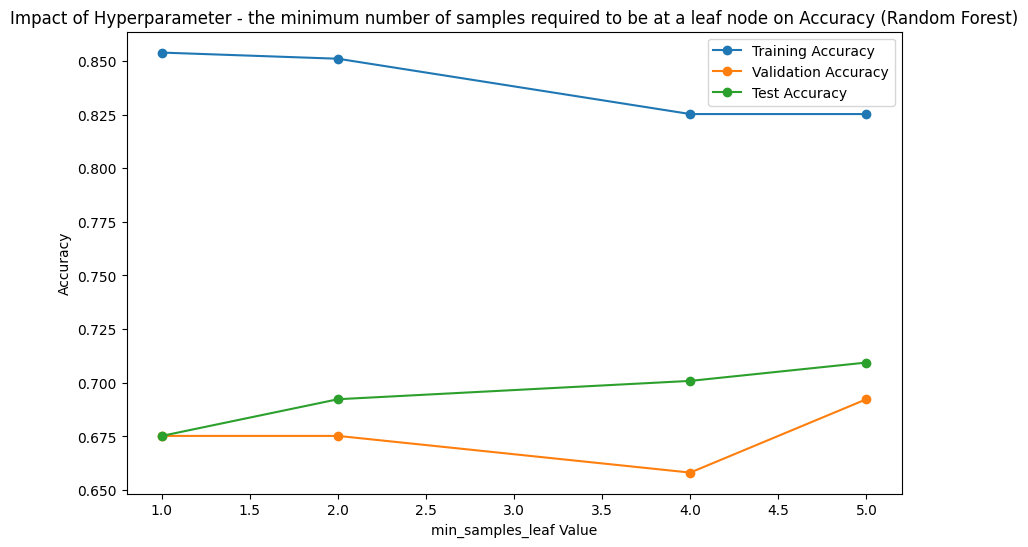

In [ ]:
min_samples_leaf_values = [1, 2, 4, 5]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different min_samples_leaf values
for min_samples_leaf_value in min_samples_leaf_values:
    # Train the model with the specified min_samples_leaf value
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=2, min_samples_leaf=min_samples_leaf_value)
    rf_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_leaf_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(min_samples_leaf_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_leaf Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter - the minimum number of samples required to be at a leaf node on Accuracy (Random Forest)')
plt.legend()
plt.show()


**Observations**

For the Minimum samples required to be at leaf node = [1, 2, 4, 5]

1. The training accuracy tends to decrease as the minimum number of samples required to be at a leaf node increases.
2. The test accuracy shows a gradual increase as the sample size increases, whereas the validation set decreases and then again increases to obtain an optimal accuracy.
3. This suggests that when leaves are required to have a higher number of samples, the model becomes less complex and less prone to overfitting.

## **5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.**

### Implementing ensemble classifier with best hyperparameters of all models

**Ensemble Learning**:

Ensemble learning stands as a machine learning approach that fuses the forecasts of numerous individual models or classifiers to arrive at a definitive prediction.
The primary objective of ensemble methods is to enhance the overall predictive capability and resilience of a model by harnessing the unique strengths of diverse base models.

- The ensemble model - Voting Classifier is trained on the training data by evaluating the best hyperparameters on each model.
- Soft Voting Classifier is implemented based on weights assigned to each classifier to evaluate higher accuracy on the ensemble model.
- Performance metrics are reported for the validation and testing sets.
- Both the validation and test accuracy of each model is compared with the help of a bar plot.


In [ ]:
# Create a Voting Classifier with the best classifiers
voting_classifier = VotingClassifier(estimators=[
    ('lr', best_classifier_lr),
    ('rf', best_classifier_rf),
    ('svc', best_classifier_svm)
], voting='soft', weights = [7,1,3])

In [ ]:
# Train the ensemble model
voting_classifier.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred_ensemble = voting_classifier.predict(X_val_scaled)
val_accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)

# Evaluate on test set
y_test_pred_ensemble = voting_classifier.predict(X_test_scaled)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)

### Reporting Validation Performance

In [ ]:
# Calculate and print metrics for the ensemble on validation set
evaluate_classifier(y_val, y_val_pred_ensemble, "Ensemble (Validation)")

Ensemble (Validation) Accuracy: 0.7436
Ensemble (Validation) Precision: 0.7338
Ensemble (Validation) Recall: 0.7436
Ensemble (Validation) F1 Score: 0.6899


### Plotting Validation accuracy - Outperforming each individual model

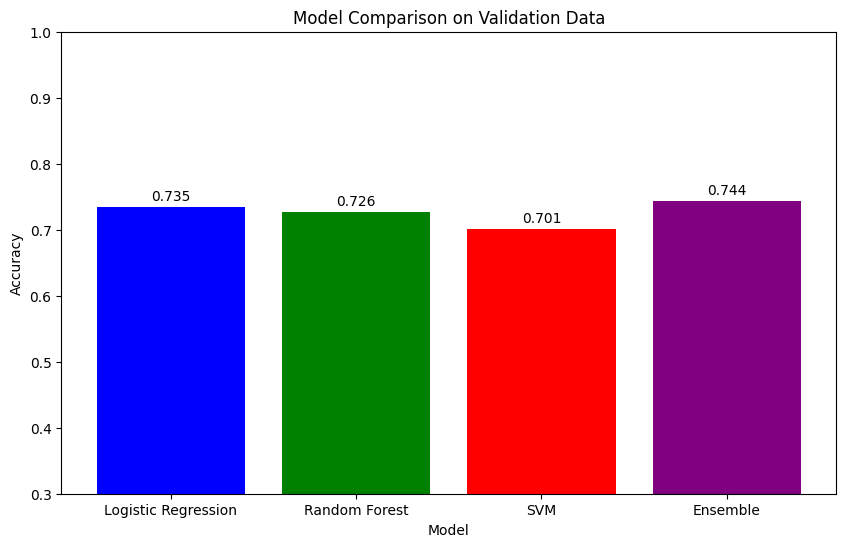

In [ ]:
# Define model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Ensemble']
accuracies = [accuracy_score(y_val, y_val_pred_lr),
              accuracy_score(y_val, y_val_pred_rf),
              accuracy_score(y_val, y_val_pred_svc),
              accuracy_score(y_val, y_val_pred_ensemble)]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Validation Data')
plt.ylim(0.3, 1.0)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 3)), color='black', ha='center')

plt.show()

**It can be observed that the Ensemble model performs well on Validation set with an accuracy of 0.744 and outperforms each model - Logistic Regression, Support Vector Machines, and Random Forest.**

### Test Set accuracy

In [ ]:
# Calculate and print metrics for the ensemble on test set
evaluate_classifier(y_test, y_test_pred_ensemble, "Ensemble (Test)")

Ensemble (Test) Accuracy: 0.7350
Ensemble (Test) Precision: 0.5625
Ensemble (Test) Recall: 0.7350
Ensemble (Test) F1 Score: 0.6373


### Plotting test set accuracy

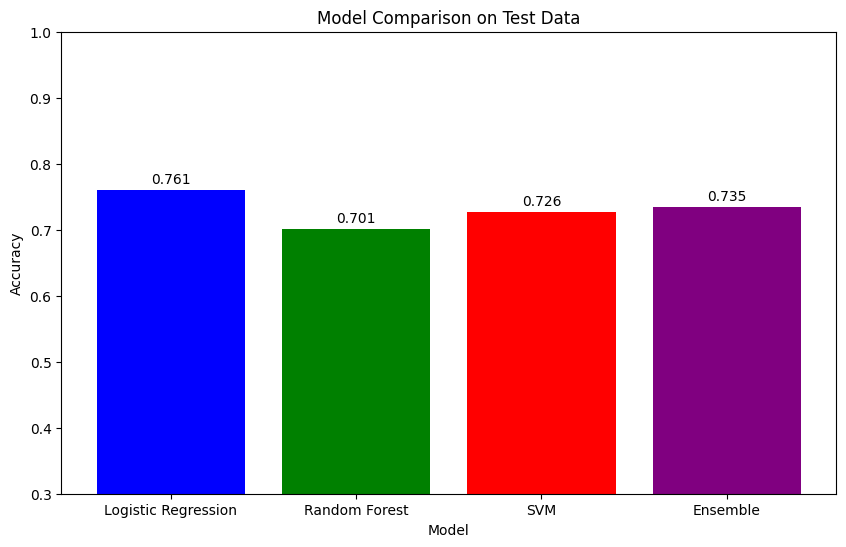

In [ ]:
# Define model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Ensemble']
accuracies = [accuracy_score(y_test, y_test_pred_lr),
              accuracy_score(y_test, y_test_pred_rf),
              accuracy_score(y_test, y_test_pred_svc),
              accuracy_score(y_test, y_test_pred_ensemble)]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Test Data')
plt.ylim(0.3, 1.0)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 3)), color='black', ha='center')

plt.show()

**It is observed that the ensemble outperforms SVM and Random Forest with an accuracy of 0.735 on test data, however it seems due to overfitting it cannot improve further more than Logistic Regression.**

## Discussion on Findings

**Findings from Ensemble learning**

1. Ensemble methods consistently outperform individual base models in terms of predictive accuracy (0.744) in case of validation data.
2. Fine-tuning hyperparameters of the base models and the ensemble itself can lead to further improvements in performance. Techniques like grid search is used to find optimal hyperparameters.
3. Soft classifier considers the probability of each model and the weights are used to determine which model should be given more priority while training.

**Overall discussion**

1. In summary, the ensemble model is doing well. Logistic Regression works the best on this dataset, as due to it being a binary classification problem, it tends to perform well.
2. We successfully achieve a fair enough accuracy on a dataset which had 12 features to predict the presence of liver disease based on the given attributes.
3. Visualizing confusion matrix, impact of hyperparameters through line graphs, and comparing accuracies proved to be a significant step in determining which model performs the best given the hyperparameters.

**Future Work**

1. An interactive web-based application can be designed that inputs the given parameters with the help of patient data, and predicts the presence of a liver disease, which will be very helpful to the medical staff.
2. Several different ensemble techniques such as ADABoost, Stacking could be tried to improve the accuracy of ensemble learning.
3. We could investigate additional relevant features or refine existing ones to improve the models' ability to detect liver diseases through feature engineering.
4. The usage of more advanced machine learning techniques such as neural networks or deep learning could be applied to train the data more accurately and yield superior results.